### Importing necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(img : np.array):
    plt.figure(figsize = (6, 6))
    plt.imshow(img, cmap = 'gray')
    
def plot_two_imgages(img1 : np.array, img2 : np.array):
    _, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(img1, cmap = 'gray')
    ax[1].imshow(img2, cmap = 'gray')

### Loading the Data

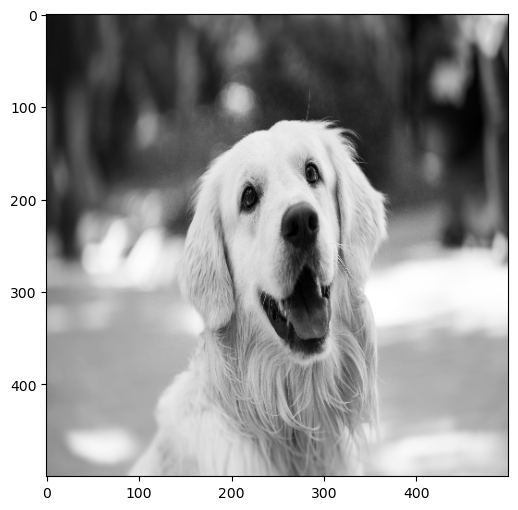

In [3]:
# reading a color image using cv2
img = cv2.imread('dog.jpg')

# converting the color image to gray scale image so as to pass it to convolve function
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# reshaping the image to get even shape
resized_image = cv2.resize(gray_img, (500, 500)) 

plot_image(img = resized_image)

### Declaring Convolution Filters

In [4]:
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

blur = np.array([[0.0625, 0.125, 0.0625],
                [0.125, 0.25, 0.125],
                [0.0625, 0.125, 0.0625]])

outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

### Padding the Original Images to retain the information after convolution

In [5]:
def get_padding_width_per_side(kernel_size : int):
    return kernel_size // 2

In [6]:
pad_3x3 = get_padding_width_per_side(3)
pad_3x3

1

In [7]:
pad_5x5 = get_padding_width_per_side(5)
pad_5x5

2

In [8]:
def add_padding_to_image(img, padding_width):
    img_with_padding = np.zeros([(img.shape[0] + padding_width * 2), (img.shape[0] + padding_width * 2)])
    
    # This will leave the padded rows and columns with zeros and the rest of the matrix
    # will be filled with img array
    img_with_padding[padding_width : -padding_width, padding_width : -padding_width] = img
    
    return img_with_padding

### Padding for a convolution filter of kernel size 3X3

(502, 502)


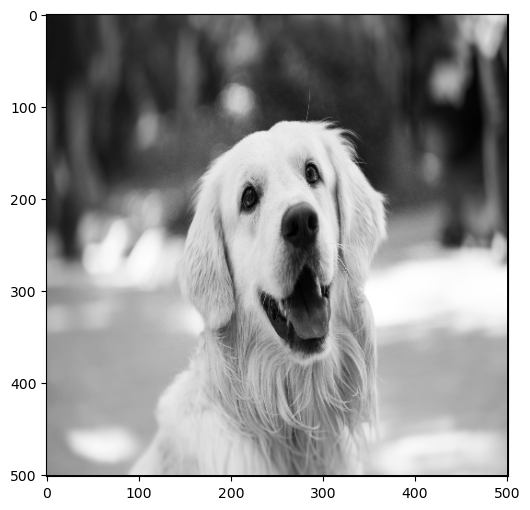

In [11]:
img_with_padding_3x3 = add_padding_to_image(resized_image, pad_3x3)
print(img_with_padding_3x3.shape)

plot_image(img_with_padding_3x3)

### Padding for a convolution filter of kernel size 5X5

(504, 504)


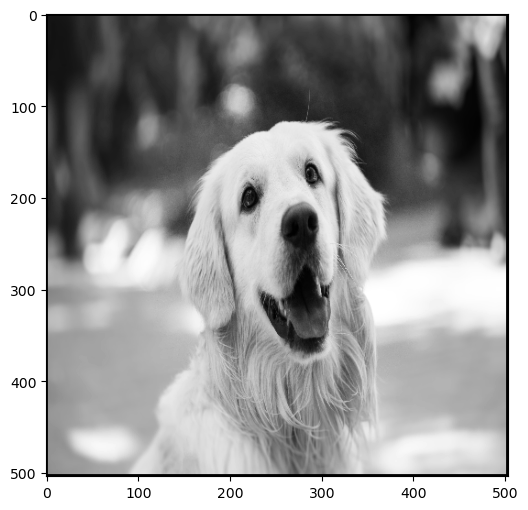

In [12]:
img_with_padding_5x5 = add_padding_to_image(resized_image, pad_5x5)
print(img_with_padding_5x5.shape)

plot_image(img_with_padding_5x5)

### Convolve Function

In [9]:
def calculate_target_size(shape, kernel, padding, stride):
    target_size = ((shape - kernel + (2 * padding)) / stride) + 1
    return target_size

In [10]:
def convolve(img_shape, img, kernel, padding_width):
    
    target_size = int(calculate_target_size(img_shape, kernel.shape[0], padding_width, 1))
    
    convolved_img = np.zeros([target_size, target_size])
    
    k = kernel.shape[0]
    for i in range(target_size):
        for j in range(target_size):
            mat = img[i : i + k, j : j + k]
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
    
    return convolved_img

### Applying Sharpen to the image with pad_3x3

In [13]:
print(img_with_padding_3x3.shape)
img_padded_3x3_sharpened = convolve(resized_image.shape[0], img_with_padding_3x3, sharpen, pad_3x3)
print(img_padded_3x3_sharpened.shape)

(502, 502)
(500, 500)


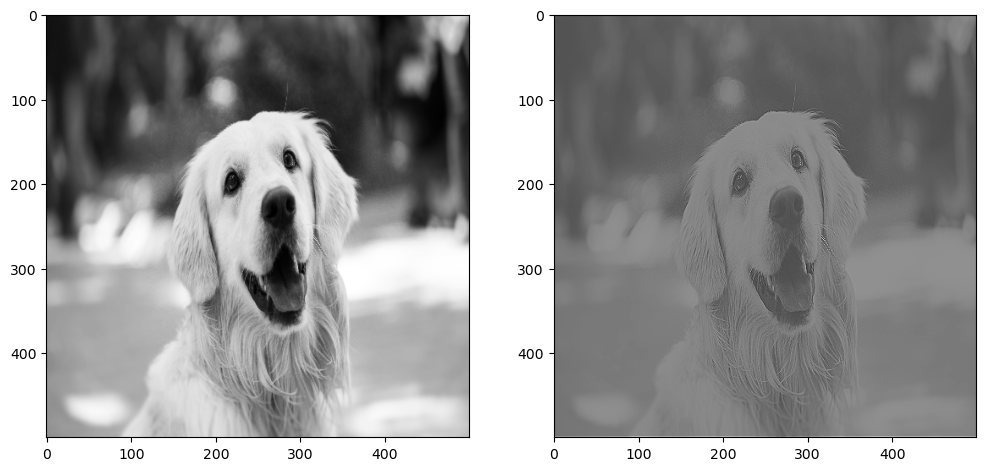

In [14]:
plot_two_imgages(img1 = resized_image, img2 = img_padded_3x3_sharpened)

### Applying Sharpen to the image with pad_5x5

In [17]:
print(img_with_padding_5x5.shape)
img_padded_5x5_sharpened = convolve(resized_image.shape[0], img_with_padding_5x5, sharpen, pad_5x5)
print(img_padded_5x5_sharpened.shape)

(504, 504)
(502, 502)


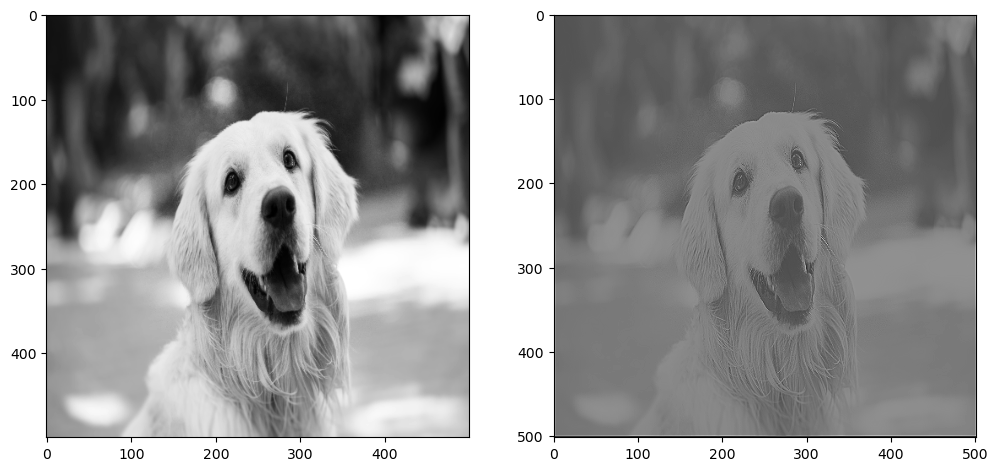

In [18]:
plot_two_imgages(img1 = resized_image, img2 = img_padded_5x5_sharpened)